<a href="https://www.kaggle.com/code/emanoelcarvalholopes/uci-lr-students-performance-prediction?scriptVersionId=215844026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Apresentação

Este notebook visa elaborar um modelo de predição da nota final dos estudantes utilizando modelos de classificação. O trabalho norteador deste é o artigo intitulado [Mineração de dados educacionais com aprendizagem de máquina][1], autoria de Vanessa Faria de Souza, no qual utiliza [UCI Machine Learning Repository][2]. Este mesmo _dataset_ foi utilizado por Ali (2023).

Alguns dos algoritmos de AM para classificação mais conhecidos são: Naïve Bayes; Árvores de Decisão, Random Forest (RF) e Suport Vector Machines (SVM). (Faria de Souza, 2021). Segundo Tan (2009), os modelos de classificação podem ser úteis para prever ou descrever conjunto de dados com categorias nominais ou binárias.


Consultando o Géron, capítulo 2, os seguintes passos são apresentados:

1. Olhar para o quadro geral;
2. Obter os dados;
3. Descobrir e visualizar os dados para obter informações;
4. Preparar os dados para os algoritmos do Aprendizado de Máquina;
5. Selecionar e treinar um modelo;
6. Ajustar o seu modelo;
7. Apresentar sua solução.

Os dados serão obtidos por meio da instalação do repositório da UCI, por meio do comando: 

`!pip install ucimlrepo`

Referências

ALI, D. A.; ABORIZKA, M.; DAHROUG, A. Prediction of Student Performance by Using Machine Learning Techniques. 2023. **4th International Conference on Artificial Intelligence, Robotics and Control (AIRC)**. Anais... Em: 2023 4TH INTERNATIONAL CONFERENCE ON ARTIFICIAL INTELLIGENCE, ROBOTICS AND CONTROL (AIRC). Cairo, Egypt: IEEE, 9 maio 2023. Disponível em: <https://ieeexplore.ieee.org/document/10303160/>. Acesso em: 9 set. 2024

FARIA DE SOUZA, V. (2021). Mineração de dados educacionais com aprendizagem de máquina. **Revista Educar Mais**, 5(4), 766–787. https://doi.org/10.15536/reducarmais.5.2021.2417

TAN, Pang-Ning; STEINBACH, Michael; KUMAR, Vipin. **Introdução ao DATAMINING:/** mineração de dados. Rio de Janeiro: Ciência Moderna, 2009. xxi, 900 p. ISBN 978-85-7393-761-9

[1]: https://periodicos.ifsul.edu.br/index.php/educarmais/article/view/2417
[2]: https://archive.ics.uci.edu/dataset/320/student+performance

# 0. Importando as bibliotecas necessárias

In [50]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline


# 2. Obter os dados

> “Na primeira etapa os dados foram coletados do repositório de dados público o UCIMachineLearning. Estes dados abordam o desempenho dos alunos no ensino secundário de duas escolas portuguesas.” (Faria De Souza, 2021, p. 773)

In [35]:
# Os dados serão obtidos por meio da instalação do repositório da UCI, por meio do comando:

!pip install ucimlrepo

In [36]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
students = fetch_ucirepo(id=320) 

São retornados, dois conjuntos de dados: features e targets. 30 colunas e 3 colunas, respectivamente.

In [37]:
students.data.features.shape

(649, 30)

In [38]:
students.data.targets.shape

(649, 3)

Comparando a quantidade de linhas com o estudo da Faria de Souza (2021), constata-se uma diferença significativa - apenas 649 ao invés de 1044 como apontado no artigo. 

## 2.1 Junção dos dados

No estudo de Faria de Souza (2021), a primeira providência na preparação dos dados foi unir os conjuntos de dados em um só. O bloco abaixo realizará esta tarefa:

In [39]:
# Junção das duas bases de dados 
# students.data.features + students_data.targets 

students_full = pd.merge(students.data.features,students.data.targets, left_index = True, right_index = True, how = 'inner')

Com o _dataset_ unificado, iremos obter informações.

In [40]:
students_full.shape

(649, 33)

# 3. Visualizar os dados para obter informações

In [41]:
# As cinco primeiras linhas do conjunto de dados unificado.

students_full.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [42]:
# Rápida descrição dos dados com o tipo de cada atributo e o número de valores não nulos.

students_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Note que o _dataset_ possui variáveis/atributos categóricos e numéricos. Portanto, será necessário transformar os dados categóricos antes de treinar qualquer modelo de aprendizagem de máquina, pois estes preferem trabalhar com dados numéricos (Géron, 2019). 

In [43]:
# Podemos visualizar as informações estatísticas dos atributos numéricos.

students_full.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


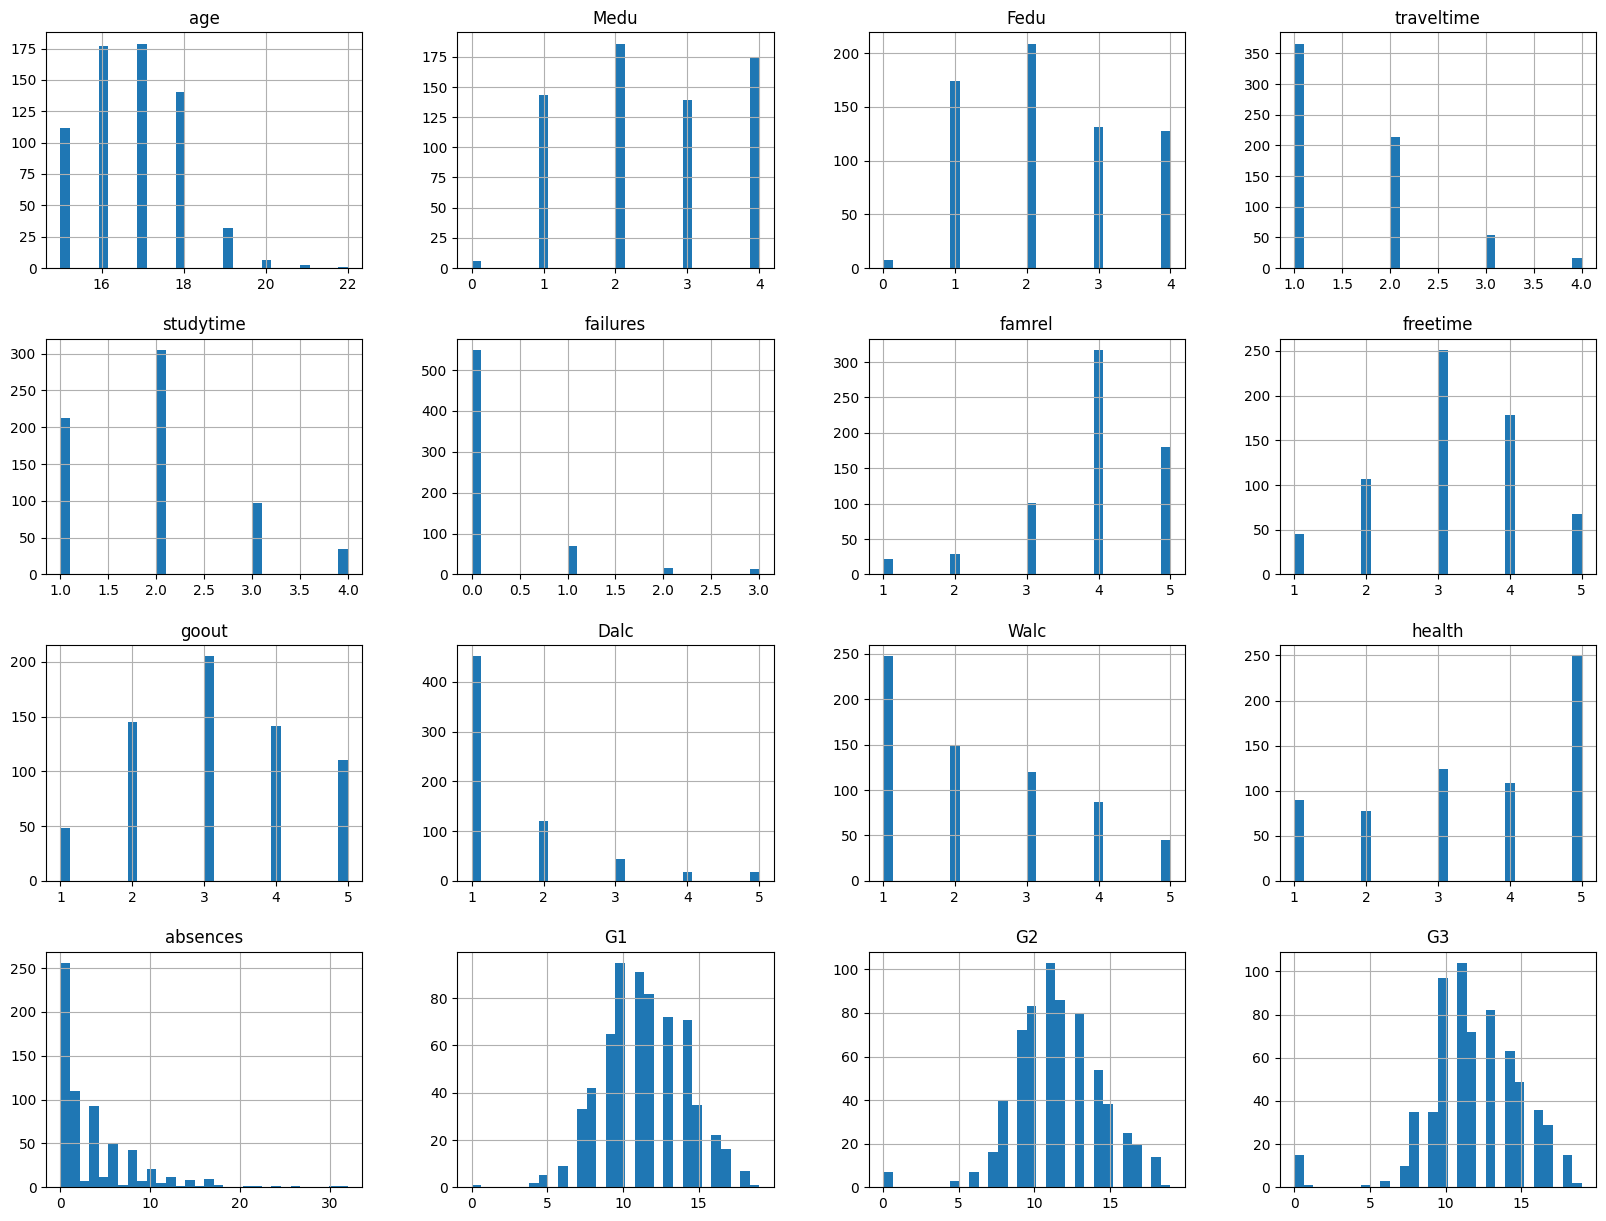

In [44]:
# Um histograma para cada atributo numérico

students_full.hist(bins=30, figsize=(20,15))
plt.show()

Um ponto interessante a observar é que quase 250 estudantes não possuem registros de faltas mas alguns estudantes possuem mais de dez faltas e isso pode provocar um viés na amostragem, levando o algoritmo de aprendizado de máquina aprender que as faltas não possuem correlação com o nota final do estudante. Considerando que Faria de Souza (2021) aponta as faltas como um atributo importante para prever a nota final, assim é importante garantir que o conjunto de testes seja representativo. 

O código a seguir cria um atributo na categoria faltas dividindo por 1,5 para limitar a quantidade de categorias de faltas e utilizando o método `ceil` para arrendondar os valores para obter categorias discretas.


<Axes: >

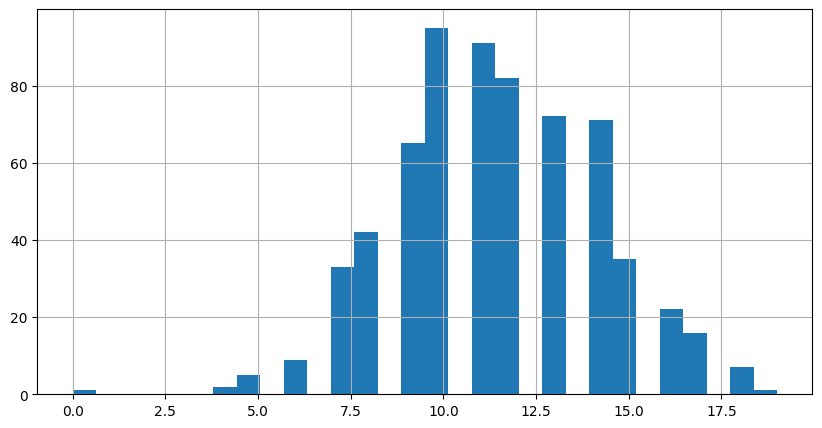

In [45]:
students_full['G1'].hist(bins=30, figsize=(10, 5))

<Axes: >

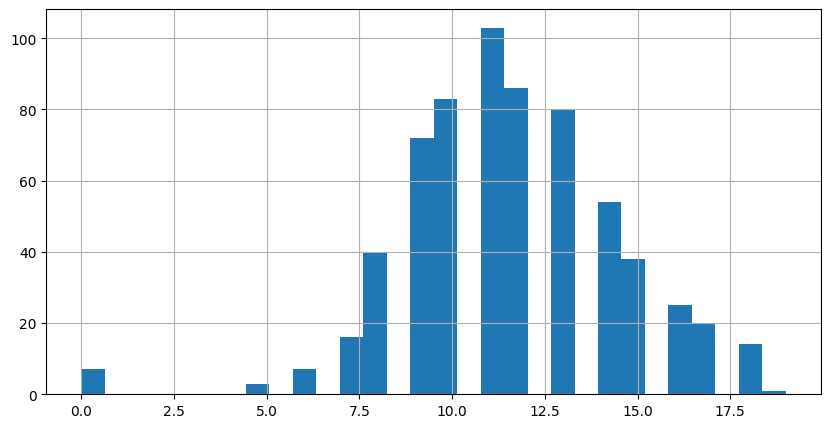

In [46]:
students_full['G2'].hist(bins=30, figsize=(10, 5))

<Axes: >

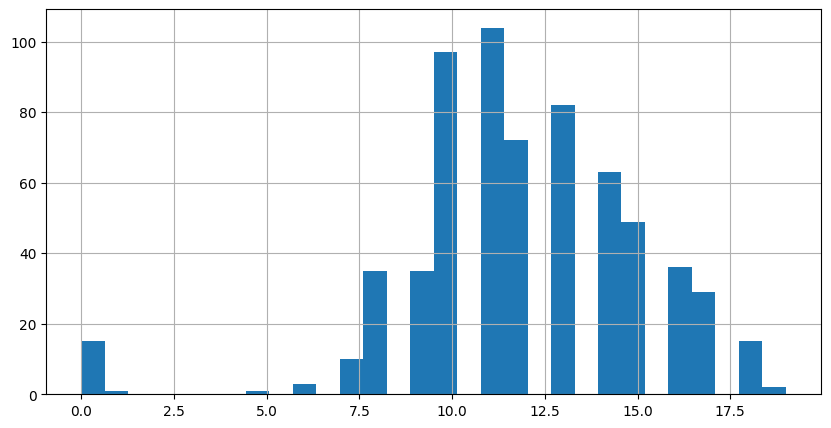

In [47]:
students_full['G3'].hist(bins=30, figsize=(10, 5))

Visualmente, percebe-se uma semelhança entre G1, G2 e G3. 

# 4. Preparação dos dados 

Primeiramente, será acrescentada uma nova coluna com níveis de classificação, para a nota final G3, como indicado por Faria de Souza (2021): notas entre 20 e 16 = “A”, notas entre 15 e 11 = “B”, notas entre 10 e 4 = “C”, notas entre 4 e 0 = “D”.

In [48]:
# Função para classificar
def classificar(nota):
    if 16 <= nota <= 20:
        return 'A'
    elif 11 <= nota <= 15:
        return 'B'
    elif 4 <= nota <= 10:
        return 'C'
    elif 0 <= nota < 4:
        return 'D'

# Aplicando a função
students_full['G3_class'] = students_full['G3'].apply(classificar)

# O conjunto de dados com a nova coluna
students_full.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,B


O próximo passo é dividir o conjunto de dados em treinamento e testes e separar a classe alvo das variáveis independentes. Para esta tarefa, será utilizada a função `train_test_split` do Scikit-Learn, reservando 20% para teste.

In [53]:
# Separar a classe alvo das variáveis independentes

y = students_full['G3']

X = students_full.drop(columns='G3') 

# Criar as variáveis de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Selecionar as colunas com baixa cardinalidade
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Selecionar as colunas numéricas
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

# Pré-processamento de dados numéricos

numerical_transformer = SimpleImputer(strategy='constant')

# Pré-processamento de dados categóricos

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pré-processamento composto de dados categóricos e numéricos 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Utilizando o modelo de Regressão Logística

log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)


ValueError: could not convert string to float: 'GP'

Com as variáveis necessárias criadas, veremos três abordagens para tratar de dados categóricos: 

1. Remover colunas com dados categóricos;
2. Converter em inteiros seguindo uma ordem (_ordinal enconding_);
3. Criação de um atributo binário para cada atributo (_one-hot enconding_).

Ademais, Géron (2019) apresenta o método `factorize()` da biblioteca pandas, no entanto, não será considerado agora.

O bloco abaixo apresenta uma função para a escolha da abordagem mais apropriada, baseada na métrica _Mean Absolute Error_ (MAE). A abordagem melhor será a que apresentar menor valor.

In [ ]:
# Função para auxiliar na comparação das abordagens
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

## 4.1 Remover colunas com dados categóricos

Nesta abordagem, serão removidas as colunas que apresentam dados categóricos.

In [ ]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_test = X_test.select_dtypes(exclude=['object'])


Validando a abordagem de remoção das colunas que contém dados categóricos.

In [ ]:
# Validando com a métrica MAE
print("MAE:") 
print(score_dataset(drop_X_train, drop_X_test, y_train, y_test))

## 4.2 Ordinal Encoding

Execute o bloco seguinte para transformar os atributos categóricos em números ordinais. 

In [ ]:
# Colunas com atributos categóricos
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_test[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Colunas categóricas que serão transformadas:', good_label_cols)
print('\nColunas categóricas que serão removidas do conjunto de dados:', bad_label_cols)

In [ ]:
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_test = X_test.drop(bad_label_cols, axis=1)

# Apply ordinal encoder 
enc =  OrdinalEncoder()
label_X_train[good_label_cols] = enc.fit_transform(X_train[good_label_cols])
label_X_test[good_label_cols] = enc.transform(X_test[good_label_cols])


In [ ]:
print("MAE para Ordinal Encoding:") 
print(score_dataset(label_X_train, label_X_test, y_train, y_test))

## 4.3 One Hot Enconding

Nesta abordagem, os atributos categóricos serão tratados com a técnica do _one-hot enconding_.

In [ ]:
# todas as colunas, exceto a última: nota final (G3)


one_hot_encoded_training_predictors = pd.get_dummies(object_cols)
oh_enc = OneHotEncoder()

# Selecionar e treinar um modelo

Modelo de classificação do tipo preditivo. 

In [ ]:
# Utilizando o modelo de Regressão Logística

log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train, y_train)

In [ ]:
# Predições

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")

Observação: este modelo precisa ser aprimorado.

In [ ]:
# Utilizando o modelo de Árvore de Decisão

In [ ]:
students_num = students_full.drop('G3', axis=1)